# Stage 3.1: Data Preparation for PVN3D

## 1. Identify all `models` in train/test dataset

3 folders to examine: `training_data`, `testing_data`, `testing_data_final`

In [8]:
from utils.utils_data import *

device = torch.device('cpu')
params = {'bz': 1, 'shuffle': True, 'num_workers':1}



''' Collect all meta files'''
META_FILES = []
meta_files = get_split_files('train')['meta_files']
META_FILES.extend(meta_files)

meta_files = get_split_files('val')['meta_files']
META_FILES.extend(meta_files)

meta_files = get_test_files(data_dir='./testing_data')['meta_files']
META_FILES.extend(meta_files)

meta_files = get_test_files(data_dir='./testing_data_final')['meta_files']
META_FILES.extend(meta_files)

OBJECTS = set()
for file in meta_files:
    try:
        meta = load_pickle(file)
        for item in zip(meta['object_ids'], meta['object_names']):
            OBJECTS.add(item)
    except:
        print(f'Lying test.txt. {file} not present in test dir')
        pass

print(f'Total number of objects: {len(OBJECTS)}')
print(OBJECTS)

fname = './training_data/objects_present.pickle'
with open(fname, 'wb') as f:
    pickle.dump(OBJECTS, f, protocol=pickle.HIGHEST_PROTOCOL)

with open(fname, 'rb') as f:
    obj = pickle.load(f)

print(obj==OBJECTS)


Total number of objects: 23
{(51, 'pudding_box'), (14, 'cracker_box'), (18, 'd_toy_airplane'), (56, 'tomato_soup_can'), (57, 'tuna_fish_can'), (13, 'c_toy_airplane'), (8, 'bleach_cleanser'), (55, 'sugar_box'), (50, 'prism'), (58, 'wood_block'), (20, 'e_lego_duplo'), (21, 'e_toy_airplane'), (35, 'jenga'), (48, 'potted_meat_can'), (39, 'master_chef_can'), (5, 'b_lego_duplo'), (42, 'mustard_bottle'), (43, 'nine_hole_peg_test'), (1, 'a_lego_duplo'), (30, 'gelatin_box'), (29, 'g_lego_duplo'), (26, 'foam_brick'), (52, 'rubiks_cube')}
True


## 2. Perform Farthest Point Sampling on Each Object 

Compute keypoints for the 23 objects present in train/test set, using IFP (iterative farthest point) sampling. (Sample 1000 points total)

The sampled points are saved as `.npy` files under `./models` folder. For example:

```python
    f"./models/{obj[1]}/visual_meshes/keypoints.npy"
```


In [20]:
import trimesh

n_points, n_farthest_points = int(1e4), int(1e3)

for obj in OBJECTS:     # e.g. (29, 'g_lego_duplo')
    obj_path = f'./models/{obj[1]}/visual_meshes/'
    dae_path = f'./models/{obj[1]}/visual_meshes/visual.dae'
    kpt_path = f'./models/{obj[1]}/visual_meshes/keypoints.npy' 

    loaded = trimesh.exchange.dae.load_collada(dae_path)
    mesh = trimesh.Trimesh(**list(loaded['geometry'].values())[0])

    pcd = trimesh.sample.sample_surface(mesh, n_points)[0]
    pcd = iterative_farthest_sampling(pcd, n=n_farthest_points)
    
    np.save(kpt_path, pcd)

''' ---- Visualize one farthest-sampled canonical pcd ---'''
print(os.listdir(obj_path))
with open(kpt_path,'rb') as f:
    pcd = np.load(f)
    print(pcd.shape)

pcd = trimesh.points.PointCloud(pcd, colors=np.array([1,1,1,1]*len(pcd)).reshape(-1, 4))
trimesh.scene.Scene([mesh, pcd]).show('notebook')

unable to load base texture
Traceback (most recent call last):
  File "/home/kyle/anaconda3/envs/open3d/lib/python3.9/site-packages/trimesh/exchange/dae.py", line 283, in _parse_material
    baseColorTexture = _load_texture(
  File "/home/kyle/anaconda3/envs/open3d/lib/python3.9/site-packages/trimesh/exchange/dae.py", line 267, in _load_texture
    file_data = resolver.get(file_name)
AttributeError: 'NoneType' object has no attribute 'get'
100%|██████████| 1000/1000 [00:00<00:00, 6534.40it/s]
unable to load base texture
Traceback (most recent call last):
  File "/home/kyle/anaconda3/envs/open3d/lib/python3.9/site-packages/trimesh/exchange/dae.py", line 283, in _parse_material
    baseColorTexture = _load_texture(
  File "/home/kyle/anaconda3/envs/open3d/lib/python3.9/site-packages/trimesh/exchange/dae.py", line 267, in _load_texture
    file_data = resolver.get(file_name)
AttributeError: 'NoneType' object has no attribute 'get'
100%|██████████| 1000/1000 [00:00<00:00, 6608.54it/s]
unab

['keypoints.npy', 'visual.dae', 'texture_map.png']
(1000, 3)


### Sample 16 Keypoints

In [4]:
import trimesh

n_points, n_farthest_points = int(1e4), 16

for obj in OBJECTS:     # e.g. (29, 'g_lego_duplo')
    obj_path = f'./models/{obj[1]}/visual_meshes/'
    dae_path = f'./models/{obj[1]}/visual_meshes/visual.dae'
    kpt_path = f'./models/{obj[1]}/visual_meshes/keypoints_16.npy' 

    loaded = trimesh.exchange.dae.load_collada(dae_path)
    mesh = trimesh.Trimesh(**list(loaded['geometry'].values())[0])

    pcd = trimesh.sample.sample_surface(mesh, n_points)[0]
    pcd = iterative_farthest_sampling(pcd, n=n_farthest_points)
    
    np.save(kpt_path, pcd)

''' ---- Visualize one farthest-sampled canonical pcd ---'''
print(os.listdir(obj_path))
with open(kpt_path,'rb') as f:
    pcd = np.load(f)
    print(pcd.shape)

pcd = trimesh.points.PointCloud(pcd, colors=np.array([1,1,1,1]*len(pcd)).reshape(-1, 4))
trimesh.scene.Scene([mesh, pcd]).show('notebook')

unable to load base texture
Traceback (most recent call last):
  File "/home/kyle/anaconda3/envs/pointnet2/lib/python3.7/site-packages/trimesh/exchange/dae.py", line 284, in _parse_material
    effect.diffuse.sampler.surface.image.path, resolver)
  File "/home/kyle/anaconda3/envs/pointnet2/lib/python3.7/site-packages/trimesh/exchange/dae.py", line 267, in _load_texture
    file_data = resolver.get(file_name)
AttributeError: 'NoneType' object has no attribute 'get'
100%|██████████| 16/16 [00:00<00:00, 3821.69it/s]
unable to load base texture
Traceback (most recent call last):
  File "/home/kyle/anaconda3/envs/pointnet2/lib/python3.7/site-packages/trimesh/exchange/dae.py", line 284, in _parse_material
    effect.diffuse.sampler.surface.image.path, resolver)
  File "/home/kyle/anaconda3/envs/pointnet2/lib/python3.7/site-packages/trimesh/exchange/dae.py", line 267, in _load_texture
    file_data = resolver.get(file_name)
AttributeError: 'NoneType' object has no attribute 'get'
100%|███████

['visual.dae', 'keypoints_16.npy', 'texture_map.png', 'keypoints.npy']
(16, 3)


## 3. Calculate Center, Center Offset, Keypoint Offset
1. Get (canonical) center
2. Calculate (world frame) center offset
3. Calculate (world frame) keypoint offset

### 1) Calculate & store canonical center

In [9]:
from utils.utils_data import *
from utils.utils_icp import *
import trimesh
import matplotlib.pyplot as plt

with open('./training_data/objects_present.pickle', 'rb') as f:
    OBJECTS = list(pickle.load(f))  # [(i_d1, name_1), ..., (id_n, name_n)]
print(f'There are [{len(OBJECTS)}] objects in total')   # 23 objects

n_points, n_farthest_points = int(1e4), 500

for i, obj in enumerate(OBJECTS):     # e.g. (29, 'g_lego_duplo')
    obj_path = f'./models/{obj[1]}/visual_meshes/'
    dae_path = f'./models/{obj[1]}/visual_meshes/visual.dae'
    kpt_path = f'./models/{obj[1]}/visual_meshes/keypoints_16.npy' 

    loaded = trimesh.exchange.dae.load_collada(dae_path)
    mesh = trimesh.Trimesh(**list(loaded['geometry'].values())[0])

    pcd = trimesh.sample.sample_surface(mesh, n_points)[0]
    pcd = iterative_farthest_sampling(pcd, n=n_farthest_points)
    ctr = get_center(pcd)
    
    ctr_path = f'./models/{obj[1]}/visual_meshes/center.npy' 

    with open(ctr_path, 'wb') as f:
        np.save(f, ctr)
    
    # if i == 2: plot_pcd_ctr(pcd, ctr)

unable to load base texture
Traceback (most recent call last):
  File "/home/kyle/anaconda3/envs/pointnet2/lib/python3.7/site-packages/trimesh/exchange/dae.py", line 284, in _parse_material
    effect.diffuse.sampler.surface.image.path, resolver)
  File "/home/kyle/anaconda3/envs/pointnet2/lib/python3.7/site-packages/trimesh/exchange/dae.py", line 267, in _load_texture
    file_data = resolver.get(file_name)
AttributeError: 'NoneType' object has no attribute 'get'


There are [23] objects in total


100%|██████████| 500/500 [00:00<00:00, 3973.76it/s]
unable to load base texture
Traceback (most recent call last):
  File "/home/kyle/anaconda3/envs/pointnet2/lib/python3.7/site-packages/trimesh/exchange/dae.py", line 284, in _parse_material
    effect.diffuse.sampler.surface.image.path, resolver)
  File "/home/kyle/anaconda3/envs/pointnet2/lib/python3.7/site-packages/trimesh/exchange/dae.py", line 267, in _load_texture
    file_data = resolver.get(file_name)
AttributeError: 'NoneType' object has no attribute 'get'
100%|██████████| 500/500 [00:00<00:00, 4028.40it/s]
unable to load base texture
Traceback (most recent call last):
  File "/home/kyle/anaconda3/envs/pointnet2/lib/python3.7/site-packages/trimesh/exchange/dae.py", line 284, in _parse_material
    effect.diffuse.sampler.surface.image.path, resolver)
  File "/home/kyle/anaconda3/envs/pointnet2/lib/python3.7/site-packages/trimesh/exchange/dae.py", line 267, in _load_texture
    file_data = resolver.get(file_name)
AttributeError:

### 2) Calculate CTOF, KPOF. Augment PCD with RGB data.

In [ ]:
from utils.utils_data import *
import trimesh
import matplotlib.pyplot as plt

device = torch.device('cpu')
params = {'bz': 1, 'shuffle': False, 'num_workers':1}
# Original 720, 1280  -> 120, 160
# H,W = 720, 1280
H, W = 120, 160     # Image height and width
transforms = {
    'rgb'  : Compose([Resize((H, W)), RandomHorizontalFlip(), ColorJitter()]),
    'depth': Compose([Resize((H, W))]),
    'label': Compose([Resize((H, W))])
}


with open('./training_data/objects_present.pickle', 'rb') as f:
    OBJECTS = list(pickle.load(f))  # [(i_d1, name_1), ..., (id_n, name_n)]
print(f'There are [{len(OBJECTS)}] objects in total')   # 23 objects

loader = get_loader(SegDataset(split_name='train', transforms=transforms, one_hot_label=False, N_samples=H*W), params=params)
sample = next(iter(loader))
'''Print-out results are produced by print()s in ./utils/utils_data.SegDataset.__getitem__()'''

rgb    = sample['rgb']        # (B,3,H,W)
label  = sample['label']      # (B,1,H,W)
depth  = sample['depth']      # (B,1,H,W)

kpof_gt = sample['kpof_gt']   # (B, N_pts, N_kps, 3)
ctof_gt = sample['ctof_gt']   # (B, N_pts, 3)
pcd_rgb = sample['pcd_rgb']   # (B, N_pts, 6)

meta   = sample['meta']       # List (B,)
suffix = sample['suffix']     # List (B,)


print(rgb.shape)
print(label.shape)
print(depth.shape)
print(kpof_gt.shape)
print(ctof_gt.shape)
print(pcd_rgb.shape)
print(len(meta))
print(len(suffix))

### 3) Downsample pcd, back project into image

---- Initializing Dataset ---- 
	 N_samples: 921600
	 Split: train
	 Train: True
	 transforms: {'rgb': Compose(
    Resize(size=(720, 1280), interpolation=bilinear, max_size=None, antialias=None)
    RandomHorizontalFlip(p=0.5)
    ColorJitter(brightness=None, contrast=None, saturation=None, hue=None)
), 'depth': Compose(
    Resize(size=(720, 1280), interpolation=bilinear, max_size=None, antialias=None)
), 'label': Compose(
    Resize(size=(720, 1280), interpolation=bilinear, max_size=None, antialias=None)
)}
There are [23] objects in total
[0 2 4 4 1 0]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(921600, 3) (720, 1280, 3)


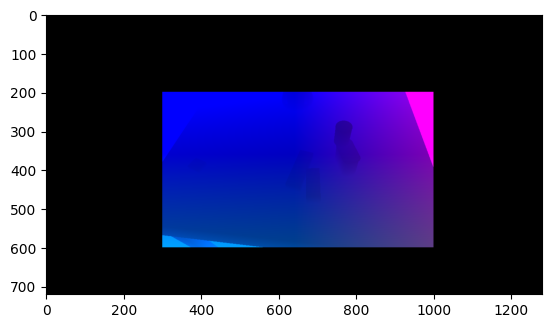

In [6]:
from utils.utils_data import *
import trimesh
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cpu')
params = {'bz': 1, 'shuffle': False, 'num_workers':1}
# Original 720, 1280  -> 120, 160
H,W = 720, 1280
# H, W = 120, 160     # Image height and width
transforms = {
    'rgb'  : Compose([Resize((H, W)), RandomHorizontalFlip(), ColorJitter()]),
    'depth': Compose([Resize((H, W))]),
    'label': Compose([Resize((H, W))])
}
de_transform = Resize((720,1280))

loader = get_loader(SegDataset(split_name='train', transforms=transforms, one_hot_label=False, N_samples=H*W), params=params)
sample = next(iter(loader))
'''Print-out results are produced by print()s in ./utils/utils_data.SegDataset.__getitem__()'''

rgb    = sample['rgb']        # (B,3,H,W)
label  = sample['label']      # (B,1,H,W)
depth  = sample['depth']      # (B,1,H,W)
kpof_gt = sample['kpof_gt']   # (B, N_pts, N_kps, 3)
ctof_gt = sample['ctof_gt']   # (B, N_pts, 3)
pcd_rgb = sample['pcd_rgb']   # (B, N_pts, 6)
meta   = sample['meta']       # List (B,)
meta = load_pickle(meta[0])
suffix = sample['suffix']     # List (B,)




# def down_sample_pcd(pcd, N=12288):
#     ''' Input pcd (n,3) np.array. Sample N points from it, return chosen indices as well'''
#     if N >= len(pcd):
#         return pcd, np.arange(len(pcd))



depth = depth.squeeze().detach().numpy()
pcd = img_to_camera(depth, rgb, meta['intrinsic'])
# plot_pcd(pcd)


# depth = depth.squeeze(0).permute(1,2,0).detach().numpy()
# rgb   = rgb.squeeze(0).permute(1,2,0).detach().numpy()
# label = label.squeeze().detach().numpy()
# visualize_one_scene(rgb, depth, label, meta, verbose=True)